First 5 rows:
   EmployeeID  Age Department  Experience  Salary
0           1   23    Finance           8   93563
1           2   28    Finance           2   41742
2           3   37         HR           8   56905
3           4   23         HR          23  138397
4           5   55         IT          29   96879

Missing values:
EmployeeID    0
Age           0
Department    0
Experience    0
Salary        0
dtype: int64

Summary statistics:
       EmployeeID        Age  Department  Experience         Salary
count    20.00000  20.000000   20.000000   20.000000      20.000000
mean     10.50000  42.450000    1.350000   16.750000  102503.150000
std       5.91608  13.092686    0.988087   10.447236   32459.740566
min       1.00000  23.000000    0.000000    2.000000   41742.000000
25%       5.75000  29.000000    1.000000    8.000000   82244.750000
50%      10.50000  46.000000    1.000000   15.500000  101315.500000
75%      15.25000  53.500000    2.000000   24.250000  132247.500000
max      20

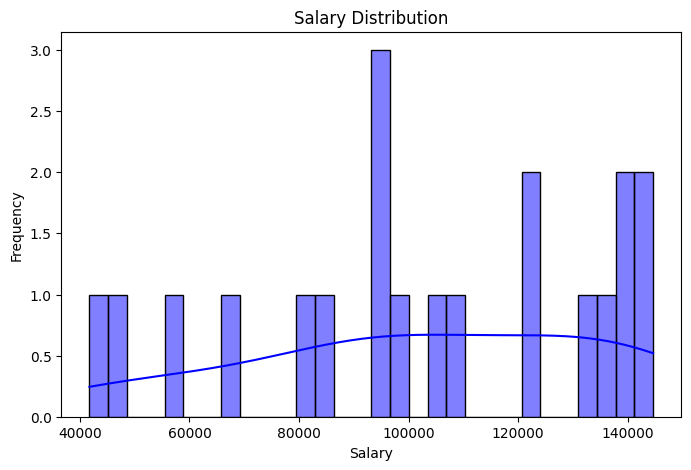

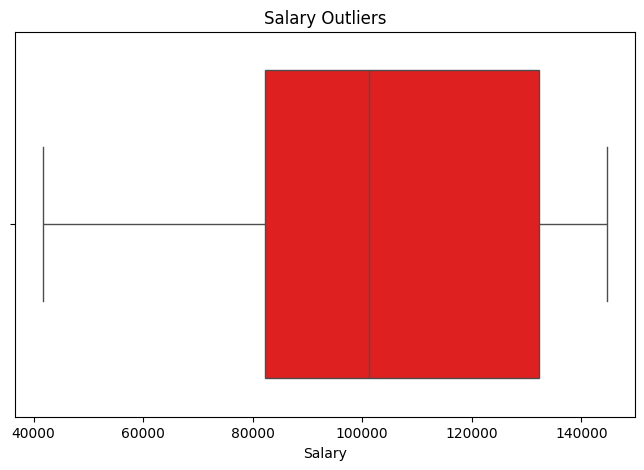


Number of outliers: 0


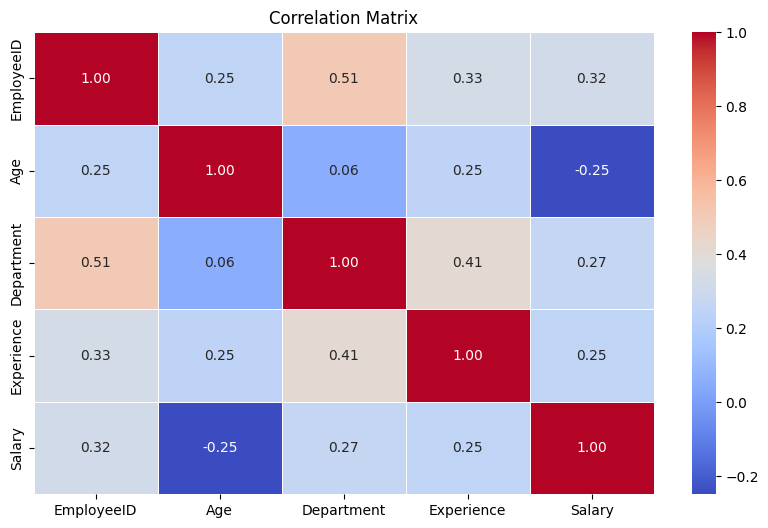

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("employee_data.csv")

# Display first few rows
print("First 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Drop rows with missing salary values
df = df.dropna(subset=['Salary'])

# Convert categorical columns to numeric (if any)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], bins=30, kde=True, color='blue')
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Salary'], color='red')
plt.title("Salary Outliers")
plt.show()

# Detect outliers using IQR method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))]
print(f"\nNumber of outliers: {len(outliers)}")

# Correlation matrix with encoded categorical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [1]:
from google.colab import files
uploaded = files.upload()

# To read a CSV file (if uploaded)
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['employee_data.csv']))
print(df.head())


Saving employee_data.csv to employee_data.csv
   EmployeeID  Age Department  Experience  Salary
0           1   23    Finance           8   93563
1           2   28    Finance           2   41742
2           3   37         HR           8   56905
3           4   23         HR          23  138397
4           5   55         IT          29   96879
